# 3. FIFA데이터셋으로 피벗테이블 만들기

이번 차시에서는 fifa21.csv를 한 번만 더 이어서 살펴보겠습니다.
엑셀의 피벗테이블에 해당하는 group_by나 crosstab, value_counts 등의 피벗 메서드를 통해
데이터프레임을 그룹화하거나 재구성해보고, 판다스를 통한 시각화도 살짝 진행해보겠습니다.

In [1]:
# 임포트
import pandas as pd

In [2]:
# 데이터셋 불러오기
df = pd.read_csv("../2_파이썬기초&판다스기초/fifa21.csv")

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,34,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3
4,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,33,1987-01-24,182,86,Uruguay,FC Barcelona,...,67+3,68+3,68+3,68+3,67+3,64+3,63+3,63+3,63+3,64+3


# ① 나라별로 선수들의 wage 합계를 구해보려면? (feat. groupby & pivot_table)

In [4]:
country_wage = df["wage_eur"].groupby(df["nationality"])
country_wage_sum = country_wage.sum()
country_wage_sum

nationality
Afghanistan       3000
Albania         388600
Algeria        1115000
Andorra            800
Angola          153000
                ...   
Uzbekistan       22000
Venezuela       376400
Wales          1206950
Zambia           64500
Zimbabwe        144000
Name: wage_eur, Length: 162, dtype: int64

In [5]:
# 위 명령어는 아래와 같이 df.pivot_table을 사용해 한 줄로 표현할 수도 있습니다.
df.pivot_table("wage_eur", index="nationality", aggfunc=sum)

,wage_eur
nationality,
Afghanistan,3000
Albania,388600
Algeria,1115000
Andorra,800
Angola,153000
...,...
Uzbekistan,22000
Venezuela,376400
Wales,1206950


In [6]:
# 기본적으로 국적 오름차순(sort_index by nationality)으로 정렬된 Series를 리턴합니다.
# sort_values를 통해 연봉합이 높은 순서로 정렬해보려면?
country_wage_sum.sort_values(ascending=False).head()

nationality
England    15706500
Spain      15556900
France     13297450
Brazil     12941350
Germany    10620450
Name: wage_eur, dtype: int64

In [7]:
# 이 중 대한민국의 연봉합은?
country_wage_sum["Korea Republic"]

1100700

# ② 대한민국의 주급 랭킹은 세계 몇위일까? (feat. rank)

In [8]:
# 대한민국의 주급 합계는 약 백십만 유로.
# 이 정도면 랭킹 몇 위일까?
country_wage.sum().rank(ascending=False)["Korea Republic"]

37.0

# ③ 국가별 평균임금과 표준편차(feat. describe & agg)

In [9]:
# 우리나라가 주급 합계 기준 37위네요.
# 선수가 많은 국가들이 있을 수도 있으니 평균과 표준편차를 알아보겠습니다.
country_wage.describe()[["mean", "std"]]\
    .sort_values(by="mean", ascending=False)

,mean,std
nationality,,
Tanzania,55000.0,NaN
Dominican Republic,33000.0,61335.144901
Bermuda,33000.0,NaN
Saint Kitts and Nevis,30500.0,40305.086528
Armenia,23500.0,26362.852653
...,...,...
United Arab Emirates,500.0,0.000000
Malawi,500.0,NaN
Papua New Guinea,500.0,NaN


In [10]:
# 위의 코드와 동일한 기능을
# agg 메서드를 통해서도 간편하게 실행할 수 있습니다.
# 리턴 결과는 동일합니다.

country_wage.agg(["mean", "std"])\
    .sort_values(by="mean", ascending=False)

,mean,std
nationality,,
Tanzania,55000.0,NaN
Dominican Republic,33000.0,61335.144901
Bermuda,33000.0,NaN
Saint Kitts and Nevis,30500.0,40305.086528
Armenia,23500.0,26362.852653
...,...,...
United Arab Emirates,500.0,0.000000
Malawi,500.0,NaN
Papua New Guinea,500.0,NaN


In [11]:
# 탄자니아, 도미니카, 버뮤다.. 대체로 생소한 국가가 주급평균이 높네요.
# (사실 스타플레이어 한 명의 몸값이 높죠. 탄자니아의 음브와나 사마타 같은..)

In [12]:
# 이번엔 영국과 이탈리아, 브라질, 대한민국의 평균주급 순위를 한 번 확인해볼까요?

country_wage.describe()[["mean"]].rank(ascending=False).loc[[
    "England", "Italy", "Brazil", "Korea Republic"]]

,mean
nationality,
England,45.0
Italy,11.0
Brazil,16.0
Korea Republic,117.0


# ④ 국가별 선수의 수(feat. value_counts)

In [13]:
# 음, 우리나라의 평균주급은 더 낮은 편이네요.
# 나라별 선수의 수가 영향이 클 것 같은데,
# 나라별 선수의 수를 집계해볼까요?
# 드디어 value_counts를 사용해볼 차례입니다.
df["nationality"].value_counts()

England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
                 ... 
New Caledonia       1
Bermuda             1
Chad                1
Tanzania            1
Nicaragua           1
Name: nationality, Length: 162, dtype: int64

# ⑤ 시각화 맛보기

<AxesSubplot:>

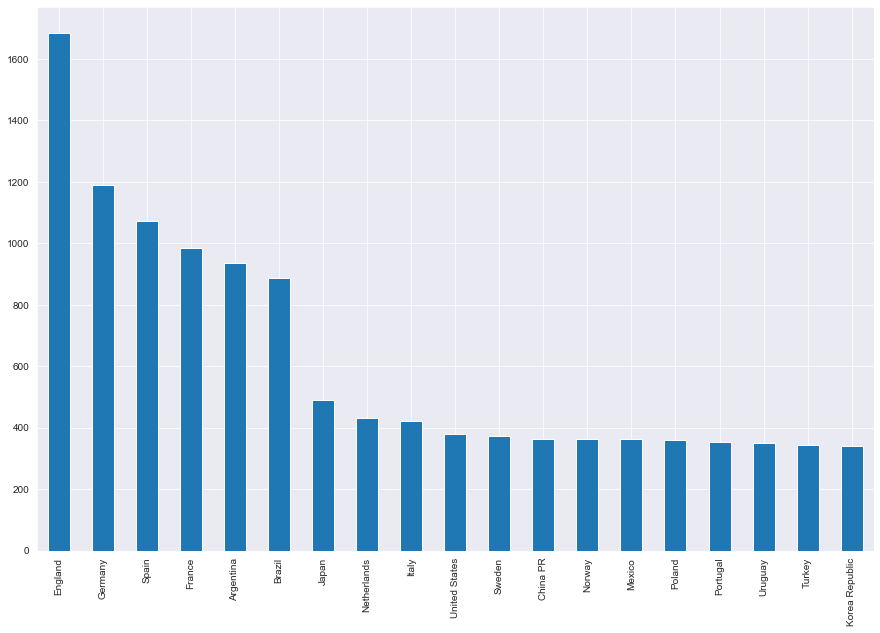

In [14]:
# 판다스의 시각화는 엄청나게 간편합니다.
# 19개국(대한민국이 19위)의 선수 수를 막대그래프로 표시하려면

df["nationality"].value_counts().head(19)\
    .plot.bar(figsize=(15, 10))

<AxesSubplot:>

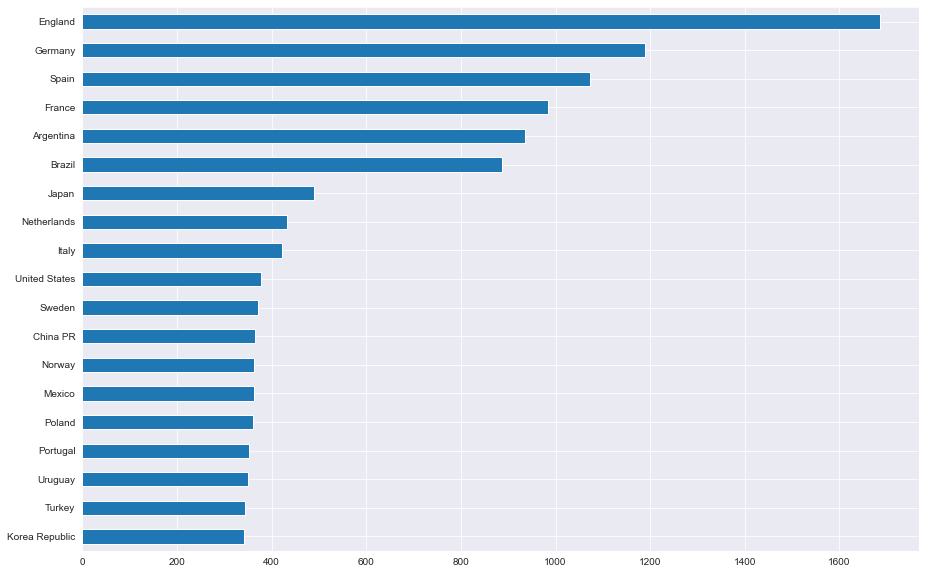

In [15]:
# 가로 막대그래프로 그려볼까요?
df["nationality"].value_counts().head(19).sort_values(ascending=True)\
    .plot.barh(figsize=(15,10))

# ⑥ 각 클럽의 국가별 선수 수를 집계하려면? (feat. multiindex, groupby, count)

In [16]:
# 보다 다양한 시각화 예제는 나중에 따로 다루겠습니다.
# 그럼 이번엔,
# 각 클럽의 국가별 선수 수를 확인해보려면?

df2 = df.groupby(["league_name", "nationality"]).count()["sofifa_id"]
df2.name = "선수 수"
df2

league_name                  nationality
Argentina Primera División   Argentina      571
                             Armenia          1
                             Chile            7
                             Colombia        20
                             Ecuador          2
                                           ... 
Venezuelan Primera División  Ghana            1
                             Mexico           1
                             Nicaragua        1
                             Uruguay          1
                             Venezuela      139
Name: 선수 수, Length: 1744, dtype: int64

# ⑦ EPL 선수의 국적 분석(feat. nlargest)

In [49]:
# EPL(English Premier League)에서 활동하는 선수들의 국적 비율이 얼마나 될까요?
df3 = df2["English Premier League"]
df3.nlargest(10)

nationality
England                271
France                  35
Spain                   30
Republic of Ireland     27
Brazil                  26
Portugal                25
Netherlands             23
Scotland                20
Argentina               14
Wales                   14
Name: 선수 수, dtype: int64

<AxesSubplot:ylabel='nationality'>

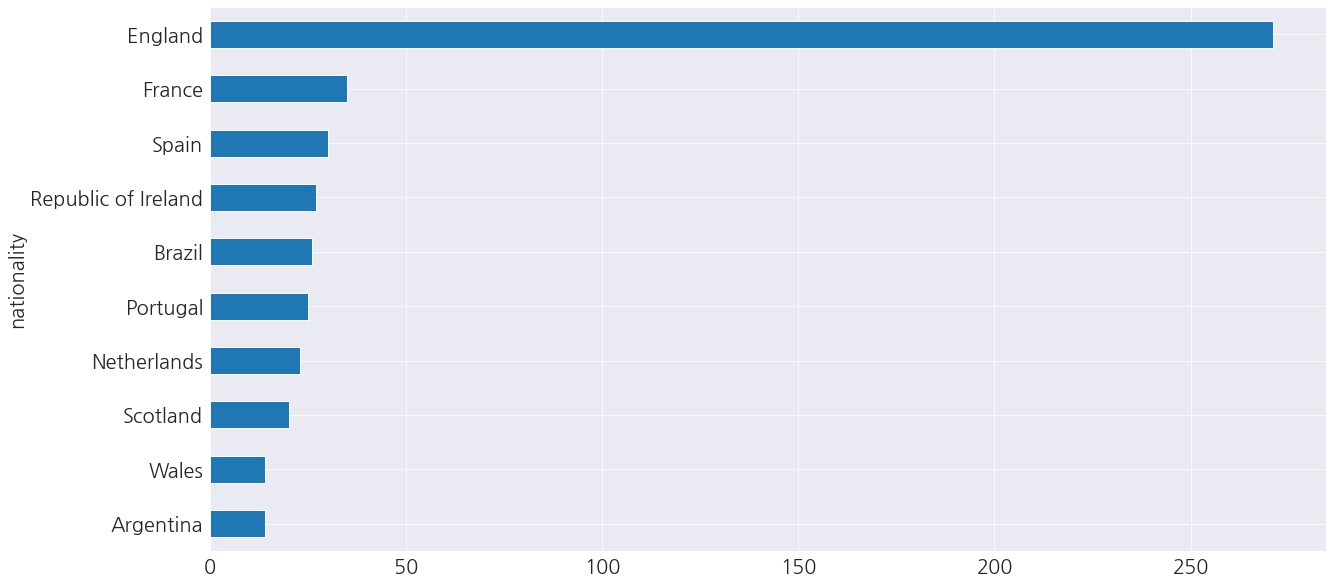

In [50]:
# 그래프로 그려볼까요?
# barh는 오름차순으로 설정해야 큰 값부터 출력됩니다.

df3.nlargest(10).sort_values(ascending=True).plot.barh(figsize=(20,10))

# ⑧ 막대끝에 레이블(annotation) 달아주기

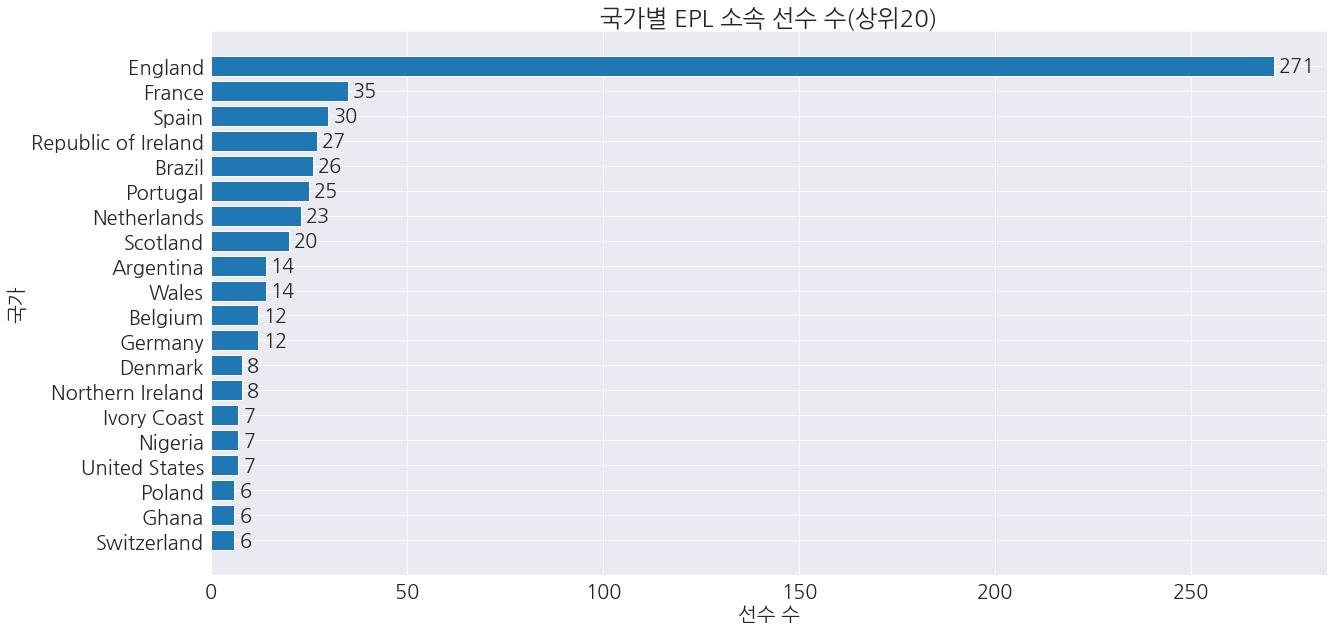

In [19]:
# 막대마다 레이블을 달아주면 어떨까요?
# 판다스에서는 제공하지 않지만, mpl에서는 bar_label로 간단히 표시가능합니다.

import matplotlib.pyplot as plt
import koreanize_matplotlib


plt.rcParams.update({'font.size':20})
# plt.rcdefaults() 명령어로 설정 초기화

fig, ax = plt.subplots(figsize=(20, 10))

hbars = ax.barh(
    df3.nlargest(20).sort_values(ascending=True).index,
    df3.nlargest(20).sort_values(ascending=True),
    align='center')

ax.set_xlabel('선수 수')
ax.set_ylabel('국가')
ax.set_title('국가별 EPL 소속 선수 수(상위20)')
ax.bar_label(hbars, padding=5)

plt.show()

# ⑨ 전 세계 선수들의 연봉 히스토그램(plot.hist)

<AxesSubplot:ylabel='Frequency'>

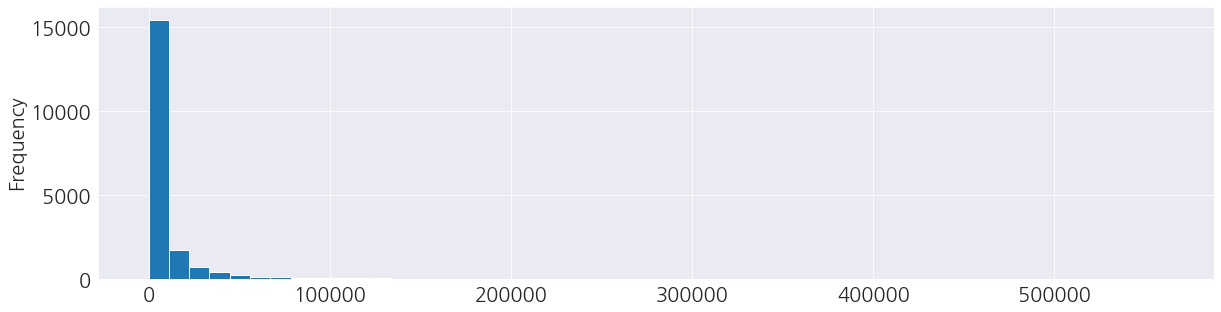

In [20]:
# 전 세계 선수들의 연봉 히스토그램을 그려보면?
# 정규분포 비슷하게 나타날까요?
df["wage_eur"].plot.hist(bins=50, figsize=(20,5))

<AxesSubplot:ylabel='Frequency'>

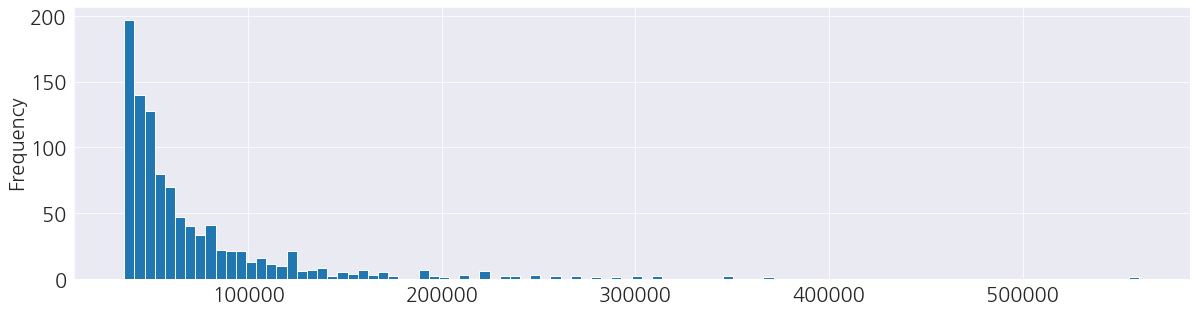

In [21]:
# 이건 뭐죠? 대부분 0에 붙어 있네요?
# 상위 1,000명의 분포만 100칸 정도로 알아봅시다.
df["wage_eur"].nlargest(1_000).plot.hist(bins=100, figsize=(20,5))

# ⑩ seaborn으로 더 예쁜 차트 그려보기

C:\Users\smj02\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


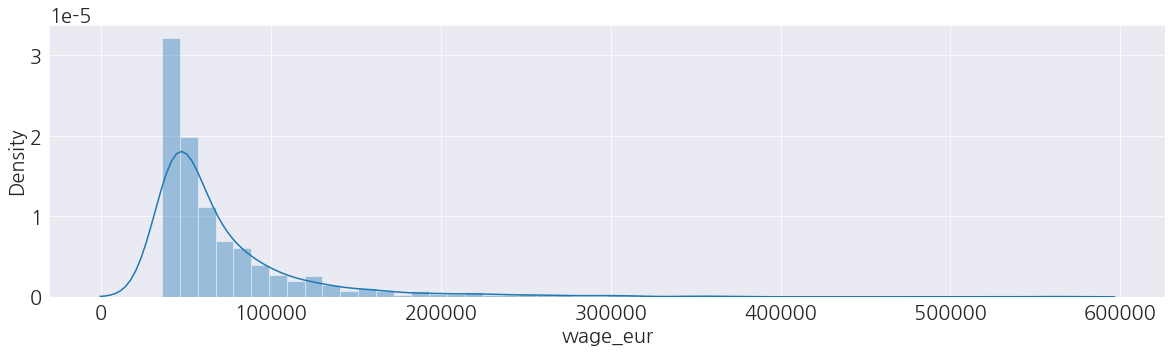

In [39]:
# seaborn으로도 그려볼까요?

import seaborn as sns


plt.figure(figsize=(20, 5))
sns.distplot(df["wage_eur"].nlargest(1000))
plt.show()

In [22]:
# 오른쪽 끝이 도대체 누구죠?
df[df["wage_eur"] > 200000][["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False)

,short_name,wage_eur
0,L. Messi,560000
7,K. De Bruyne,370000
13,E. Hazard,350000
11,K. Benzema,350000
56,Casemiro,310000
12,T. Kroos,310000
9,S. Agüero,300000
10,Sergio Ramos,300000
19,A. Griezmann,290000
4,L. Suárez,280000


In [23]:
# 메시였군요?
# 마지막으로, wage_eur과 상관관계가 높을 법한 칼럼은 어떤 게 있을까요?

# ⑪ 상관관계 분석(피어슨 상관계수)

<AxesSubplot:xlabel='wage_eur', ylabel='value_eur'>

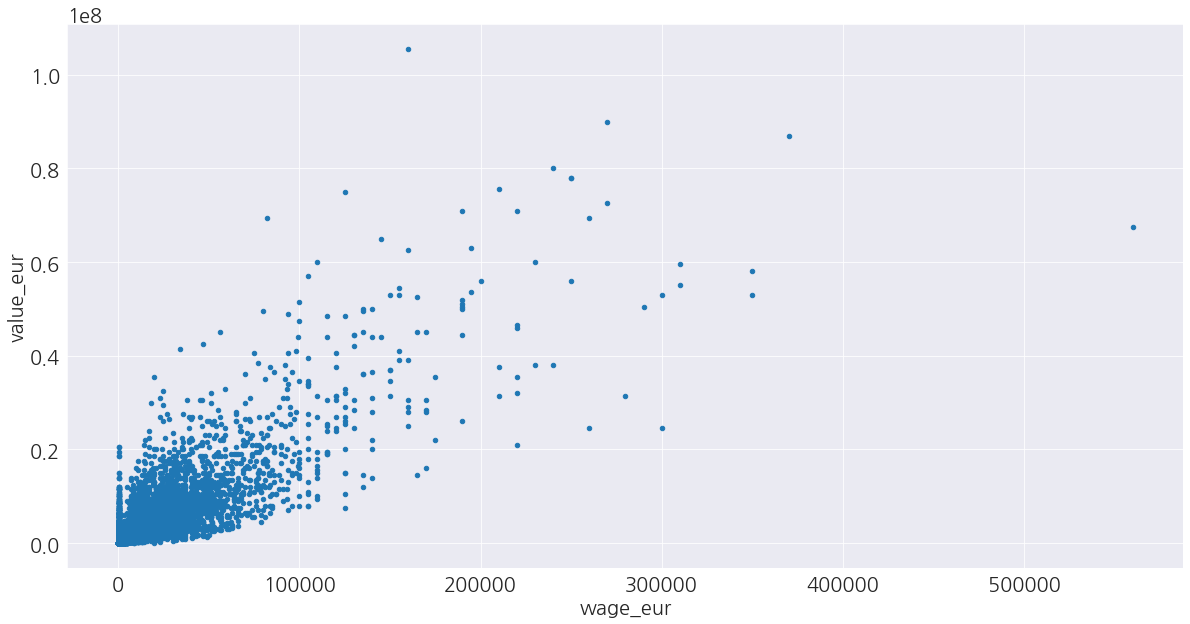

In [24]:
# ① wage_eur : value_eur

# plt.figure(figsize=(20, 10))
# plt.scatter(df["wage_eur"], df["value_eur"])
df.plot.scatter("wage_eur", "value_eur", figsize=(20, 10))

<AxesSubplot:xlabel='wage_eur', ylabel='overall'>

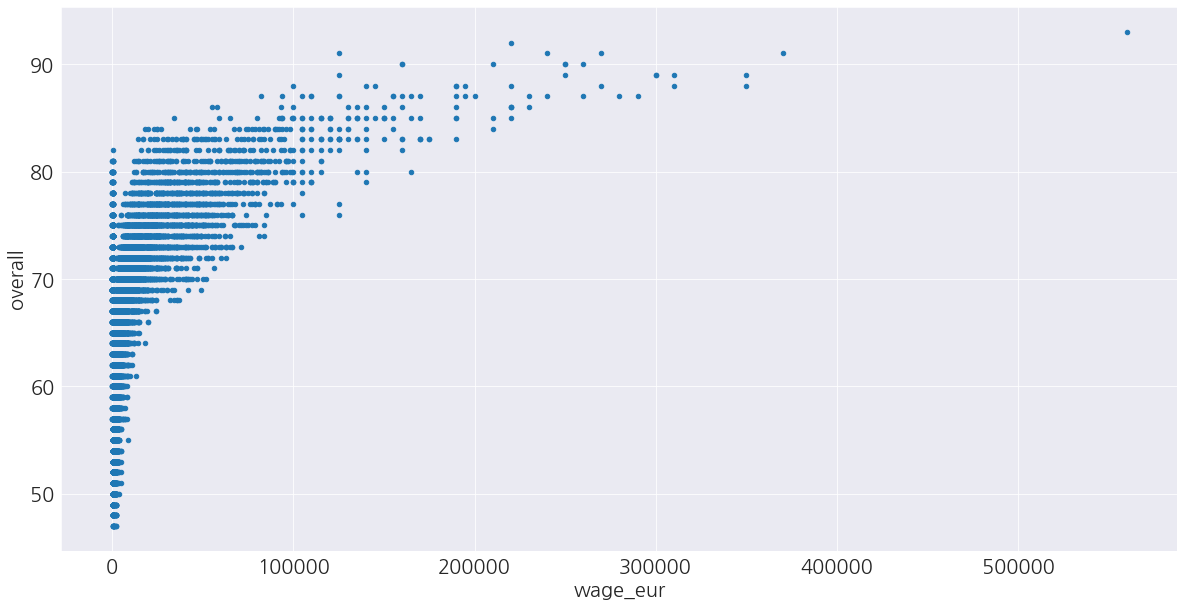

In [25]:
# ② wage_eur : overall

# plt.figure(figsize=(20, 10))
# plt.scatter(df["wage_eur"], df["overall"])
df.plot.scatter("wage_eur", "overall", figsize=(20, 10))

In [52]:
# 추세가 제법 뚜렷하네요. (다양한 기법으로 예측도 가능할 것으로 예상됩니다.)
# 먼저 피어슨 상관관계 분석으로 wage_eur, value_eur, overall의 상관계수를 알아보겠습니다.

corr = df[["wage_eur", "value_eur", "overall"]].corr(method="pearson")
corr

,wage_eur,value_eur,overall
wage_eur,1.000000,0.840126,0.574230
value_eur,0.840126,1.000000,0.630085
overall,0.574230,0.630085,1.000000


In [53]:
# 피어슨의 상관계수는 일반적으로,
# -1.0 ~ -0.7 이면, 강한 음적 상관관계
# -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
# -0.3 ~ -0.1 이면, 약한 음적 상관관계
# -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
# +0.1 ~ +0.3 이면, 약한 양적 상관관계
# +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
# +0.7 ~ +1.0 이면, 강한 양적 상관관계로 해석됩니다.

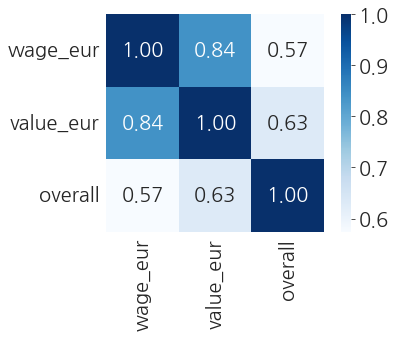

In [54]:
# 위 상관관계를 시각화해보겠습니다.

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20},
                         fmt = '.2f', square = True, cmap = 'Blues')

# cbar(컬러바)는 오른쪽에 있는 막대(범주)를 표시하는 것입니다.
# annot(어노테이션)는 상관계수를 표시합니다.
# annot_kws는 상관계수의 글자 크기를 지정합니다.
# fmt 는 상관계수의 소수점 자리수를 지정합니다.
# square는 정사각형으로 지정하는 것이며, False로 설정 시 직사각형이 됩니다.
# cmap은 색상을 지정합니다.

# 이번 차시를 마치며

번갯불에 콩 구워먹는 느낌으로 이번 차시 예제코드를 마칩니다.
파이썬 라이브러리, 특히 판다스를 활용하여 데이터 분석에 입문하게 되면
처음엔 엑셀 같은 툴을 사용하는 게 워낙 익숙하기도 하고,
판다스의 다양한 인터페이스나 문법이 잘 와닿지 않습니다.
(분명 오랜 기간, 삽질도 많이 하게 되고요.)
그럼에도 pandas라는 데이터분석 도구를 어느 정도 마스터한다면
탐색이나 집계 뿐만 아니라 통계분석이나 모델링 작업에도
큰 도움이 될 것입니다.

나아가 판다스의 고급 사용자가 되고 싶다면
온라인의 튜토리얼이나 교재 뿐만 아니라,
판다스 공식문서(https://pandas.pydata.org/docs/)를 틈틈이 읽어보시기 바랍니다.
아무쪼록 이 튜토리얼이 여러분의 업무와, 판다스 입문에 도움이 되었으면 좋겠습니다.

다음 차시에서 뵙겠습니다.